<a href="https://colab.research.google.com/github/Dee0802/MLnow_2.0/blob/main/MLass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to Download the dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/download)

**Date Created**: June 12, 2021

Topic: Univariate Linear Regression

**Author**:
Deepika Vasili

[[Assessment Repository](https://github.com/Dee0802/MLnow_2.0]

##Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/gs'

/content/drive/MyDrive/gs


In [ ]:
ls


'Life Expectancy Data.csv'   univariate_lifedata_2.csv


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from tensorflow import keras
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [ ]:
lifedata = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
lifedata.shape

(2938, 22)

In [ ]:
lifedata.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
lifedata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


##Data Processing

In [ ]:
print(f'Country: {lifedata.Country.unique()}')
print(f'Status: {lifedata.Status.unique()}')

Country: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Repu

In [ ]:
'''lifedata['Country']=lifedata[lifedata['Country'].isin(['United States of America', 'Georgia', 'Germany','Belgium','Sri Lanka','Singapore', 'Turkey' ,'Slovakia', 'Thailand','Iceland', 
                                                       'India','Zimbabwe','Spain','Sweden' ,'Switzerland','Indonesia','New Zealand', 'Philippines', 
                                                       'Poland' ,'Portugal','Malaysia','Argentina', 'Ethiopia', 'Fiji', 'Finland' ,'France', 'Armenia' ,'Australia',
                                                       'Austria','Ireland', 'Israel','Italy', 'Jamaica' ,'Japan' ,'Jordan', 'Kazakhstan', 'Kenya' ,'Maldives'])]'''

    

In [ ]:
#print(f'Country:{lifedata.Country.unique()}')

Country:[nan 'Argentina' 'Armenia' 'Australia' 'Austria' 'Belgium' 'Ethiopia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Iceland' 'India'
 'Indonesia' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Malaysia' 'Maldives' 'New Zealand' 'Philippines'
 'Poland' 'Portugal' 'Singapore' 'Slovakia' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Thailand' 'Turkey' 'United States of America' 'Zimbabwe']


In [ ]:
#lifedata.dropna(subset=['Country'],inplace=True)

In [ ]:
#lifedata['Country']

80      Argentina
81      Argentina
82      Argentina
83      Argentina
84      Argentina
          ...    
2933     Zimbabwe
2934     Zimbabwe
2935     Zimbabwe
2936     Zimbabwe
2937     Zimbabwe
Name: Country, Length: 608, dtype: object

In [ ]:
#lifedata.Country.unique()

array(['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Malaysia',
       'Maldives', 'New Zealand', 'Philippines', 'Poland', 'Portugal',
       'Singapore', 'Slovakia', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'United States of America',
       'Zimbabwe'], dtype=object)

In [ ]:
lifedata.shape

(2938, 22)

In [ ]:
lifedata.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


##Data Visualization

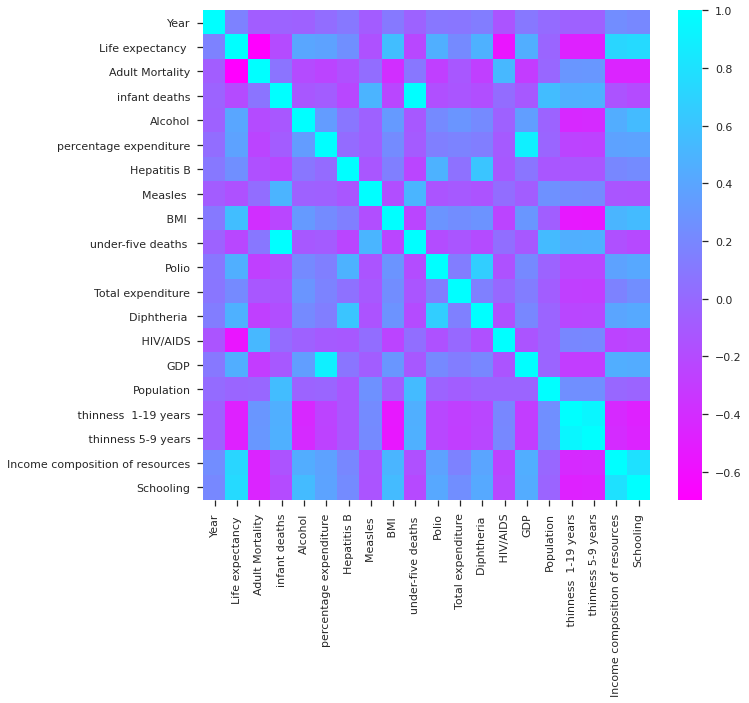

In [ ]:
cmat = lifedata.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(cmat, vmax=1,cmap='cool_r')

In [ ]:
lifedata.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

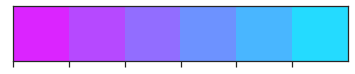

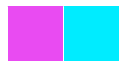

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('cool_r')) 
pal = sns.color_palette('cool_r', 2) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#e94bf2', '#00ecff'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

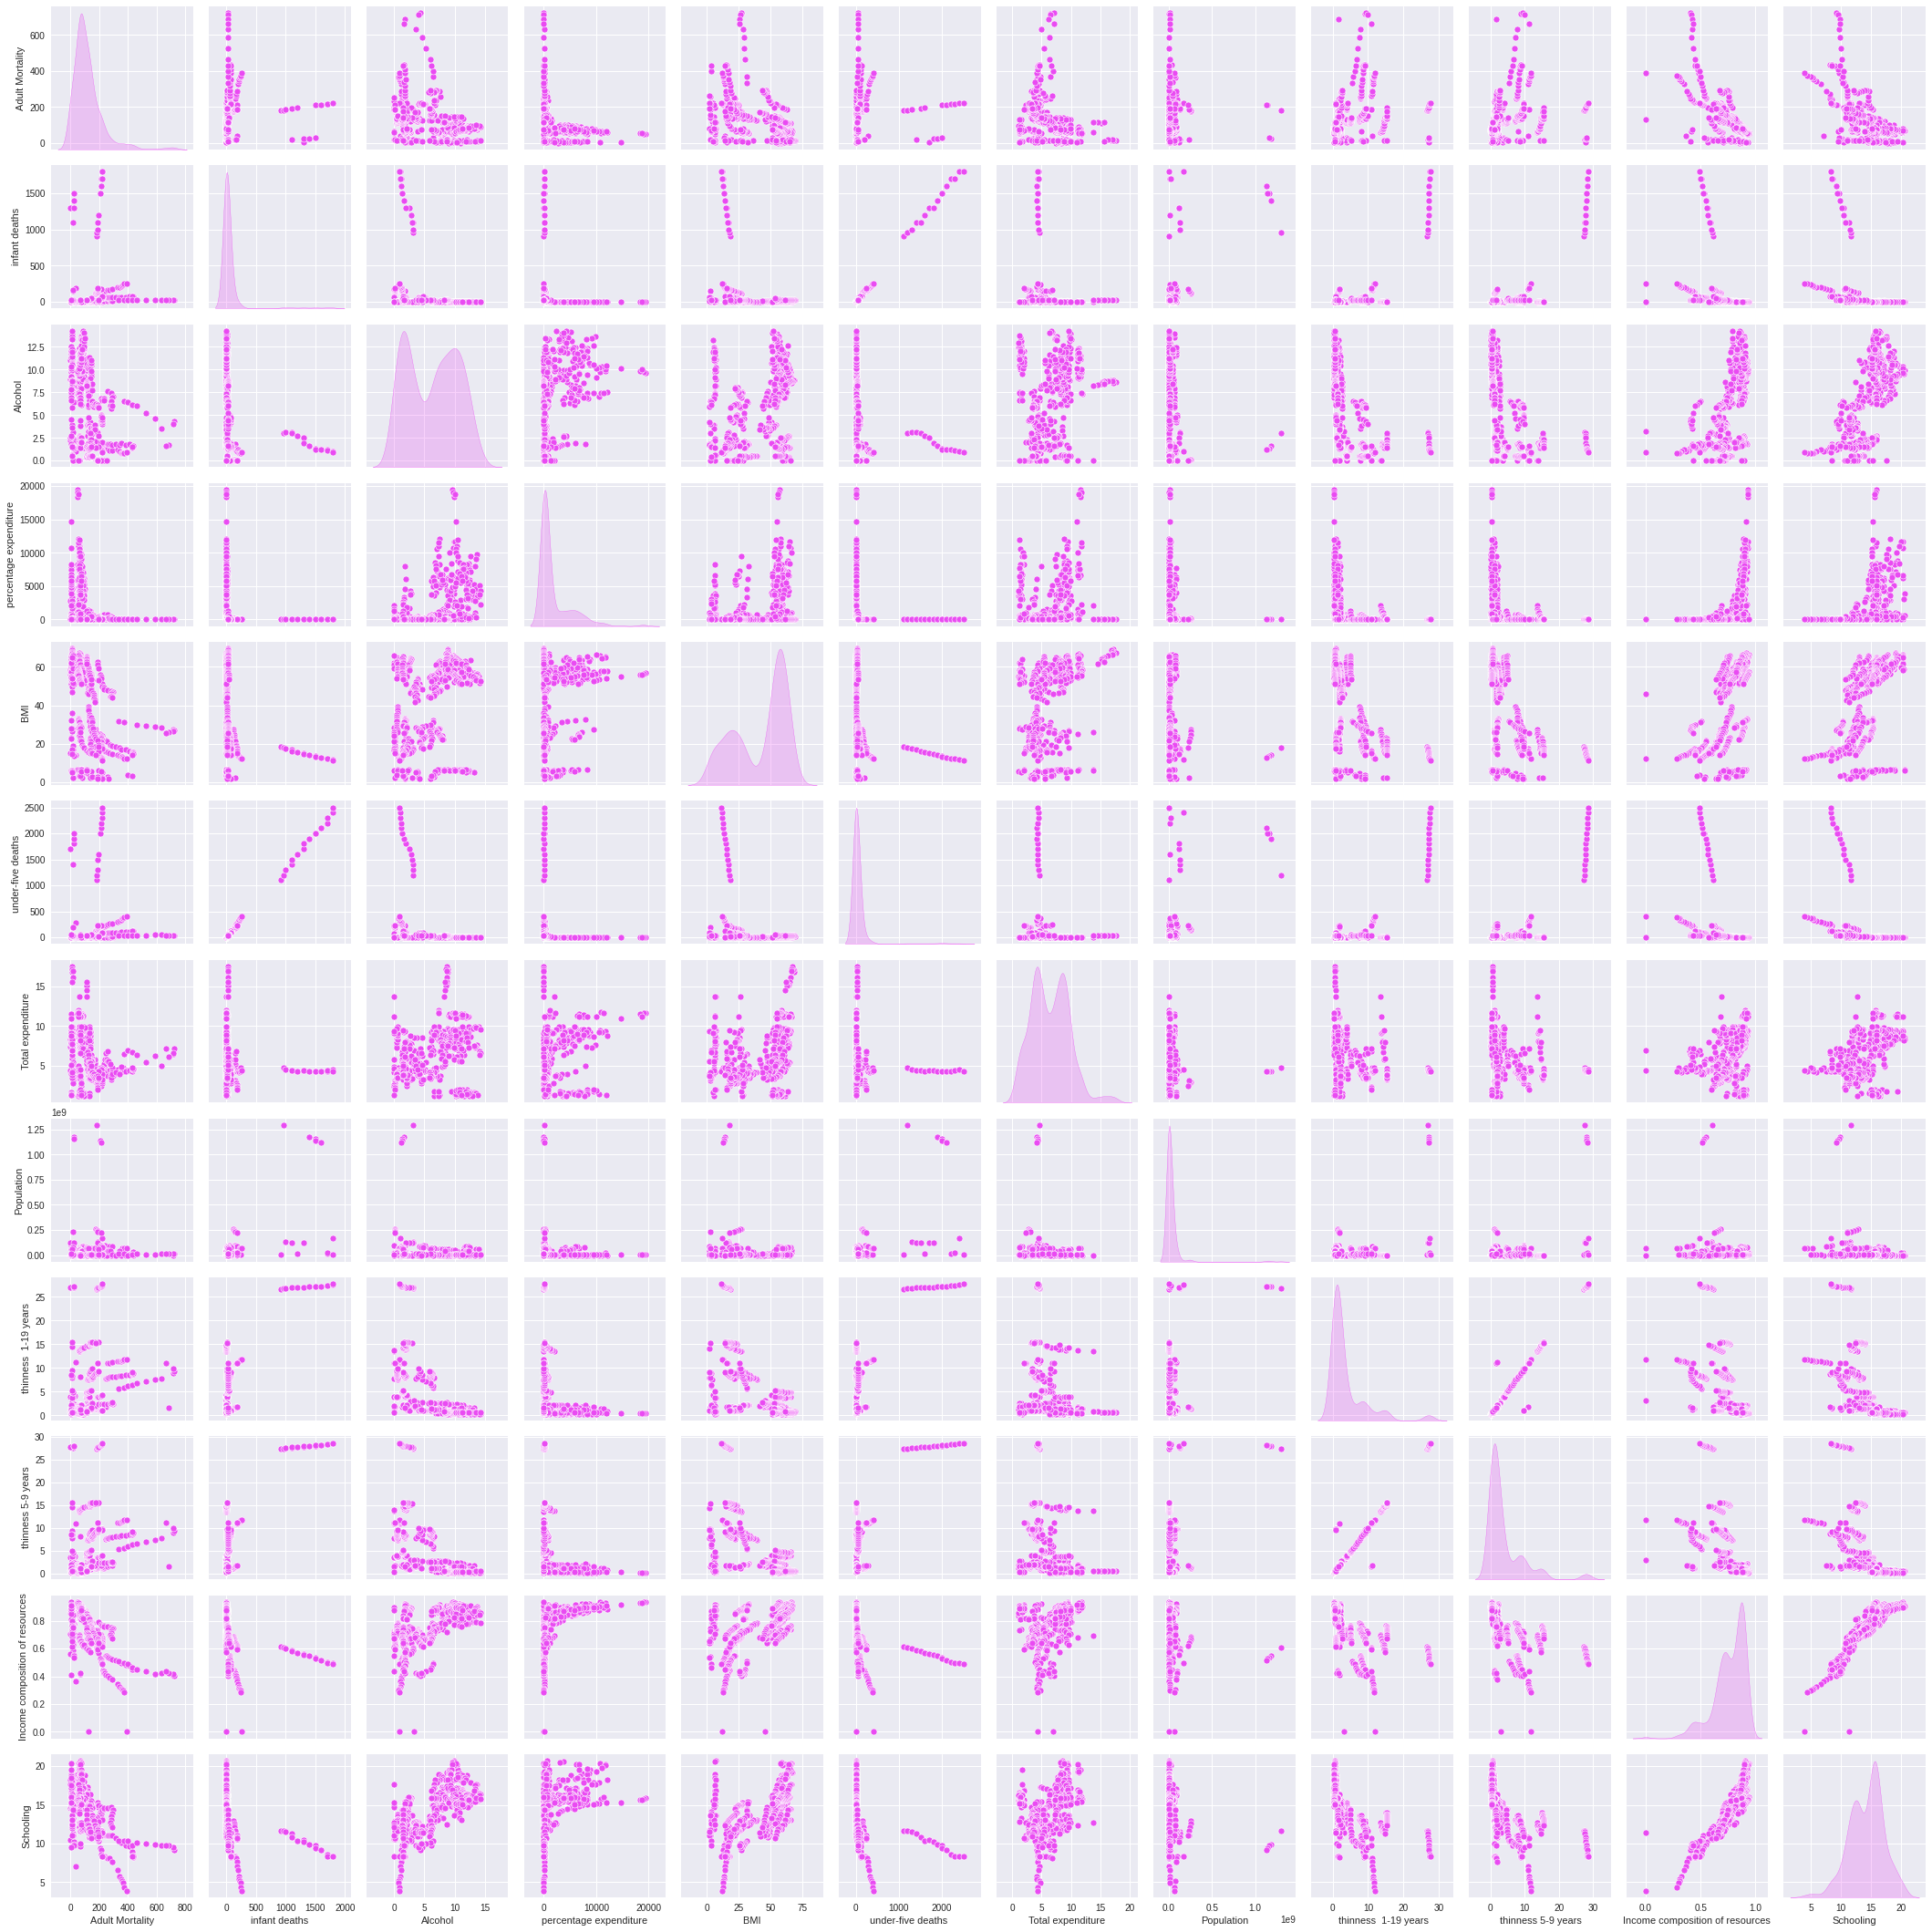

In [ ]:
'''sns.pairplot(lifedata,
             x_vars = [ 'Adult Mortality',
       'infant deaths', 'Alcohol',  ' BMI ', 'Total expenditure', 
       ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
             y_vars = [   'Adult Mortality',
       'infant deaths', 'Alcohol', ' BMI ', 'Total expenditure',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],diag_kind='kde')'''
     

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

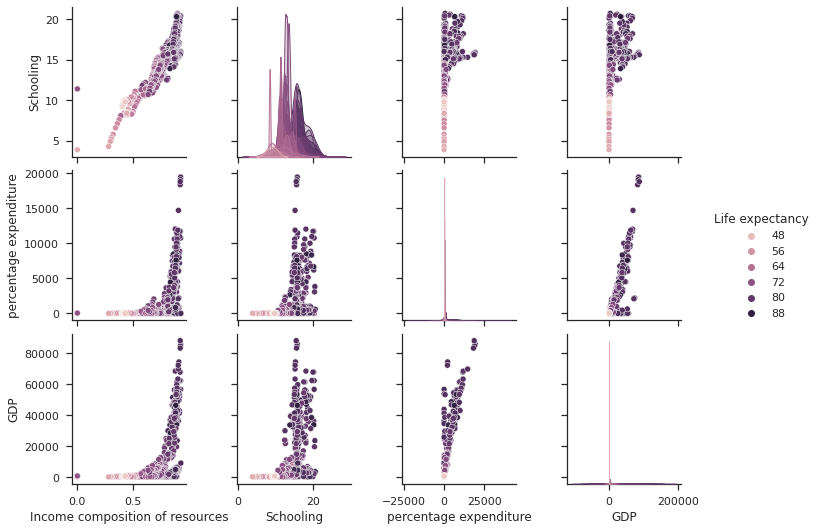

In [ ]:
'''sns.set(style="ticks", color_codes=True)
sns.pairplot(lifedata,x_vars=[ 'Income composition of resources', 'Schooling','percentage expenditure','GDP'],
             y_vars=[ 'Schooling','percentage expenditure','GDP'],hue='Life expectancy ', diag_kind='kde')'''


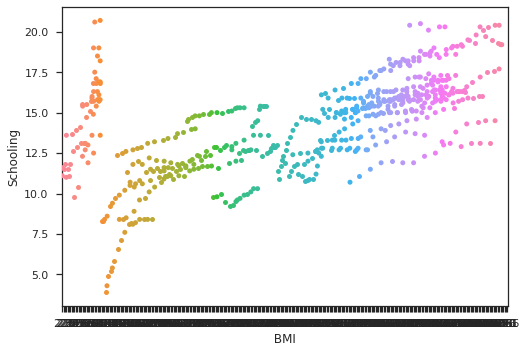

In [ ]:
#sns.stripplot(y='Schooling', x=' BMI ', data=lifedata)

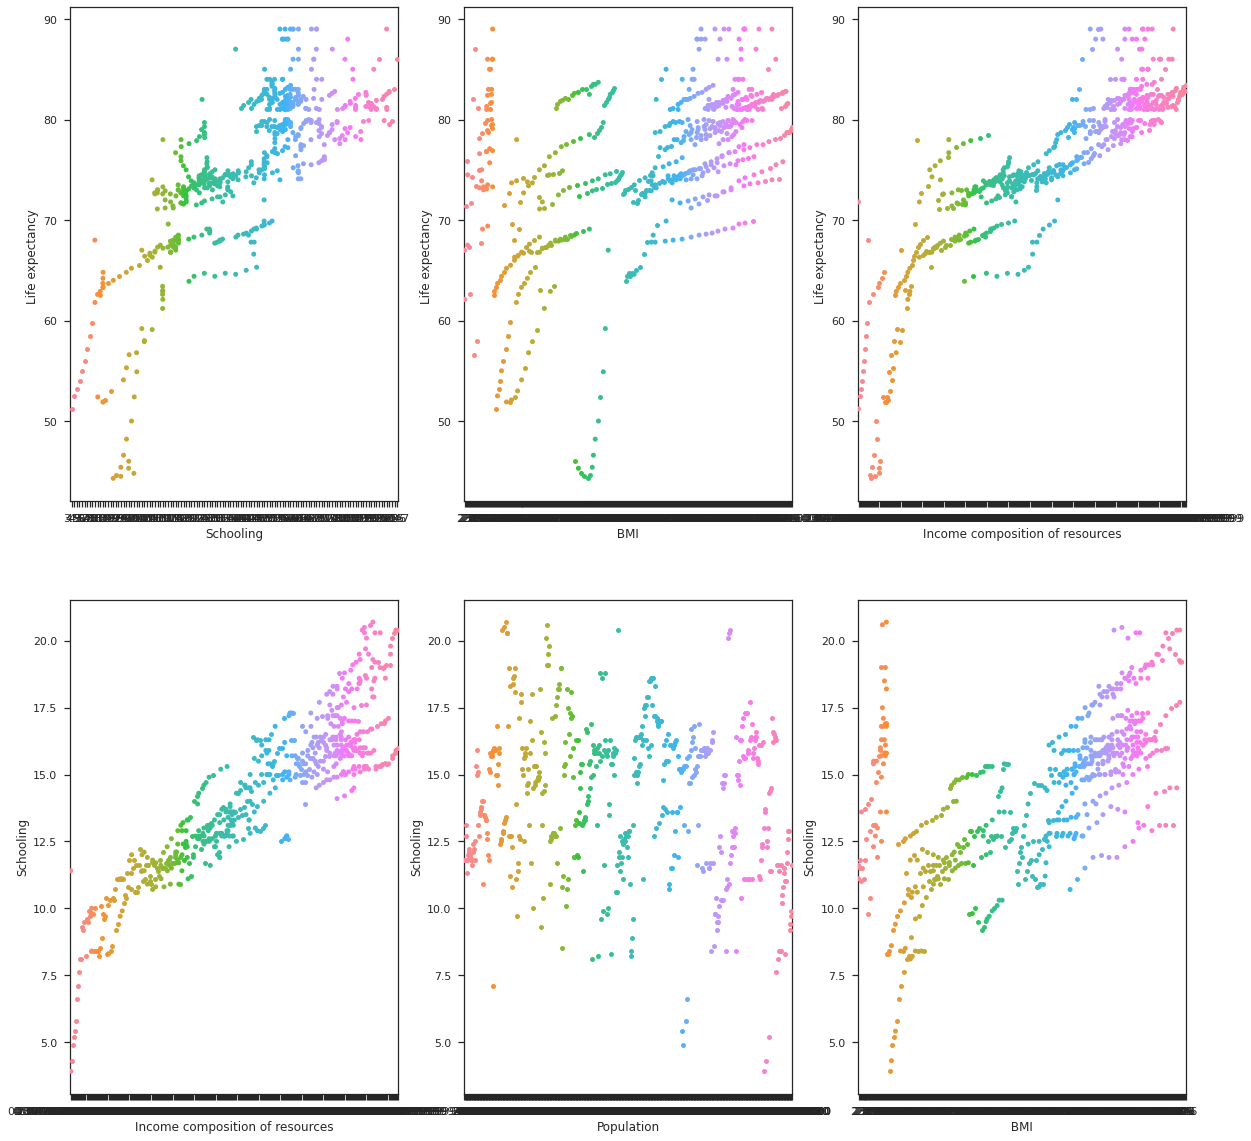

In [ ]:
'''fig, axarr = plt.subplots(2,3, figsize=(20,20))

#three rows and 2 columns all starting from (0,0)

sns.stripplot(y='Life expectancy ', x='Schooling', data=lifedata, hue=None, ax=axarr[0][0])
sns.stripplot(y='Life expectancy ', x=' BMI ', data=lifedata, hue=None, ax=axarr[0][1])
sns.stripplot(y='Life expectancy ', x='Income composition of resources', data=lifedata, hue=None, ax=axarr[0][2])
sns.stripplot(y='Schooling', x='Income composition of resources', data=lifedata, hue=None,  ax=axarr[1][0])
sns.stripplot(y='Schooling', x='Population', data=lifedata, hue=None, ax=axarr[1][1])
sns.stripplot(y='Schooling', x=' BMI ', data=lifedata, hue=None, ax=axarr[1][2])'''

##Feature selection/Data Cleaning

In [ ]:
unilifedata=lifedata[['Schooling','Income composition of resources']]
unilifedata.head()

,Schooling,Income composition of resources
0,10.1,0.479
1,10.0,0.476
2,9.9,0.470
3,9.8,0.463
4,9.5,0.454


In [ ]:
unilifedata.to_csv('univariate_lifedata_2.csv')

In [ ]:
ls

'Life Expectancy Data.csv'   univariate_lifedata_2.csv


In [ ]:
unilifedata.columns

Index(['Schooling', 'Income composition of resources'], dtype='object')

##Data visualization of Cleaned data

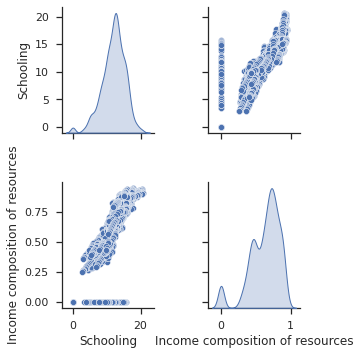

In [ ]:
sns.pairplot(unilifedata,
             x_vars = ['Schooling', 'Income composition of resources'],
             y_vars =  ['Schooling', 'Income composition of resources'],
       diag_kind='kde'
             )

##Data Splits

In [ ]:
#80-20 train-test percent split
trainDataset=unilifedata.sample(frac=0.8,random_state=0)
testDataset=unilifedata.drop(trainDataset.index)

trainDataset.head()
testDataset.head()

,Schooling,Income composition of resources
0,10.1,0.479
3,9.8,0.463
7,8.7,0.433
21,12.5,0.725
24,11.6,0.703


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(2350, 2)
(588, 2)


In [ ]:
trainfeatures=trainDataset.copy()
testfeatures=testDataset.copy()

In [ ]:

trainlabels = trainfeatures.pop('Schooling')
testlabels = testfeatures.pop('Schooling')

print(trainlabels.tail())
print(testlabels.head())


115     20.1
288     12.5
2868    11.8
1181    18.3
337     12.6
Name: Schooling, dtype: float64
0     10.1
3      9.8
7      8.7
21    12.5
24    11.6
Name: Schooling, dtype: float64


In [ ]:
print(trainfeatures.head())
print(testfeatures.head())

      Income composition of resources
867                             0.860
1780                            0.552
621                             0.488
2715                            0.483
2717                            0.477
    Income composition of resources
0                             0.479
3                             0.463
7                             0.433
21                            0.725
24                            0.703


In [ ]:

model = tf.keras.Sequential([ tf.keras.layers.Dense(1)])

In [ ]:
model.compile(
    loss = 'mean_absolute_error', 
    optimizer = tf.keras.optimizers.Adam(0.001),
   
    metrics = ['mae', 'mse']
)

In [ ]:
numEpochs = 100
history = model.fit(x = trainfeatures, y = trainlabels, validation_data = (testfeatures, testlabels), epochs = numEpochs)

Epoch 1/600
74/74 [==============================] - 1s 3ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 2/600
74/74 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 3/600
74/74 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 4/600
74/74 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 5/600
74/74 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 6/600
74/74 [==============================] - 0s 2ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 7/600
74/74 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan 